# Supervised methods

In [1]:
import pandas as pd

df = pd.read_csv('temp/Delivery_truck_trip_data_autoencoder_df.csv')

In [2]:
df.reset_index(drop=True, inplace=True)
X = df.drop(['ontime'], axis=1)
y = df['ontime']

# split X y to train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X

### Create a Table of performance

In [209]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

table_of_performance = pd.DataFrame(columns=['algorithm', 'confusion matrix', 'accuracy', 'precision', 'recall'])

def add_performance(algorithm, y_test, y_predict):
    global table_of_performance
    
    cm = confusion_matrix(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    new_row = {'algorithm': algorithm, 'confusion matrix': cm, 'accuracy': accuracy, 'precision': precision, 'recall': recall}

    table_of_performance.loc[len(table_of_performance)] = new_row

### XGBoost

In [210]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
y_predict = XGB.predict(X_test)

add_performance('XGBoost', y_test, y_predict)

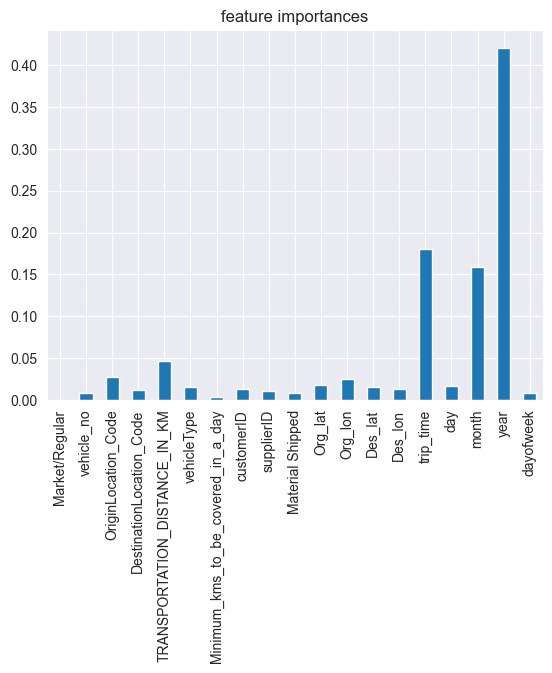

In [211]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(XGB.feature_importances_, index = X.columns)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

### Logistic Regression

In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

LR = LogisticRegression()
LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)

add_performance('logistic regression', y_test, y_predict)

/Users/boweigao/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


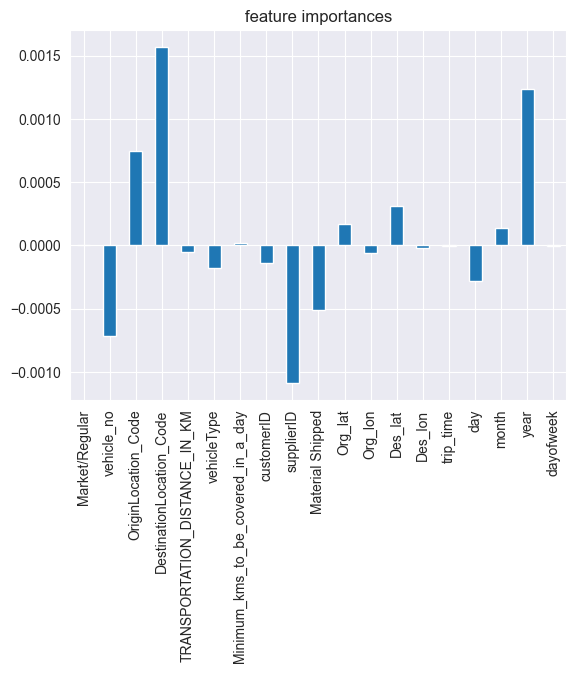

In [213]:
feature_importances = pd.Series(LR.coef_[0], index = X.columns)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

### Random Forest

In [214]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_predict = RF.predict(X_test)

add_performance('random forest', y_test, y_predict)

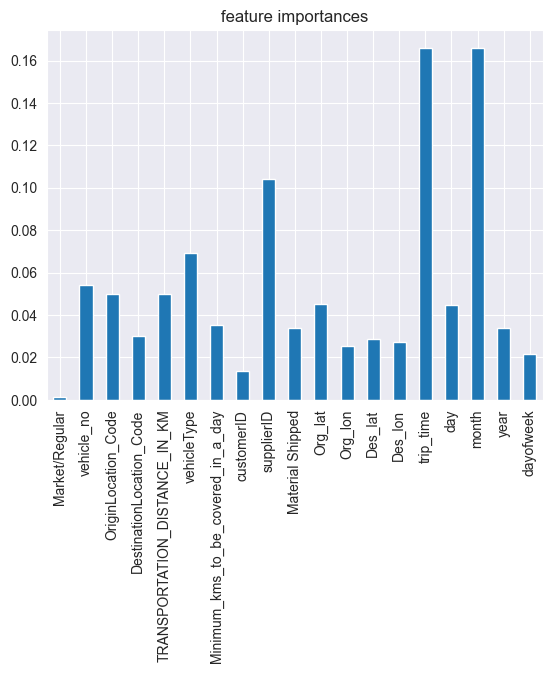

In [215]:
feature_importances = pd.Series(RF.feature_importances_, index = X.columns)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

### Gradient-boosted trees

In [216]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
y_predict = GBC.predict(X_test)

add_performance('gradient-boosted trees', y_test, y_predict)

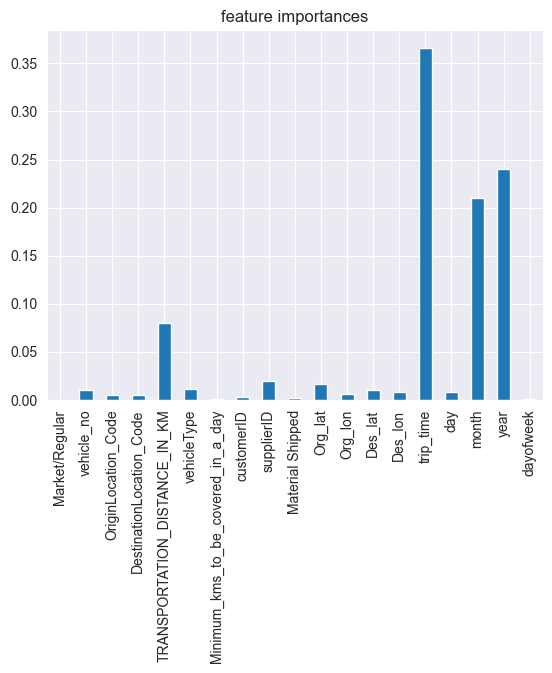

In [217]:
feature_importances = pd.Series(GBC.feature_importances_, index = X.columns)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

### Decision Trees

In [218]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
y_predict = DTC.predict(X_test)

add_performance('decision trees', y_test, y_predict)

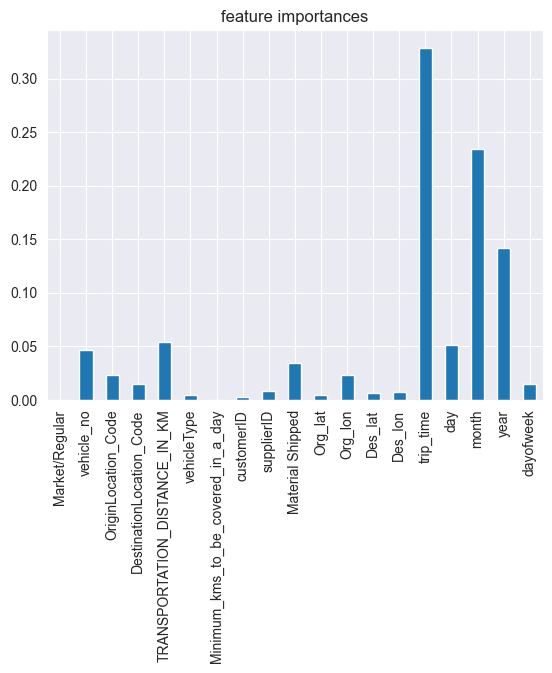

In [219]:
feature_importances = pd.Series(DTC.feature_importances_, index = X.columns)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

### Naive Bayes

In [220]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_predict = GNB.predict(X_test)

add_performance('naive bayes', y_test, y_predict)

### Support Vector Machines

In [221]:
from sklearn.svm import SVC

SV = SVC()
SV.fit(X_train, y_train)
y_predict = SV.predict(X_test)

add_performance('support vector machine', y_test, y_predict)

### Performance

In [222]:
table_of_performance.to_csv('temp/Delivery_truck_trip_data_supervised_performance.csv', index=False)

Important features:
• year
• month
• day

• trip_time
• Minimum_kms_to_be_covered_in_a_day
• transportation_distance_in_km

• supplierID
• Origin_Location_code
Note: There can be some correlation between the above 3 features. Suppier information is more important than customer information. Geo locations of customers is important, but identity of them isn't.

• vehicle type
• vehicle no.

### Testing combinations of features

In [223]:
columns1 = ['OriginLocation_Code', 'vehicle_no', 'TRANSPORTATION_DISTANCE_IN_KM', 'vehicleType', 'Minimum_kms_to_be_covered_in_a_day', 'supplierID', 'trip_time', 'day', 'month', 'year']

X1_train = X_train[columns1]
X1_test = X_test[columns1]

In [224]:
table_of_performance = pd.DataFrame(columns=['algorithm', 'confusion matrix', 'accuracy', 'precision', 'recall'])

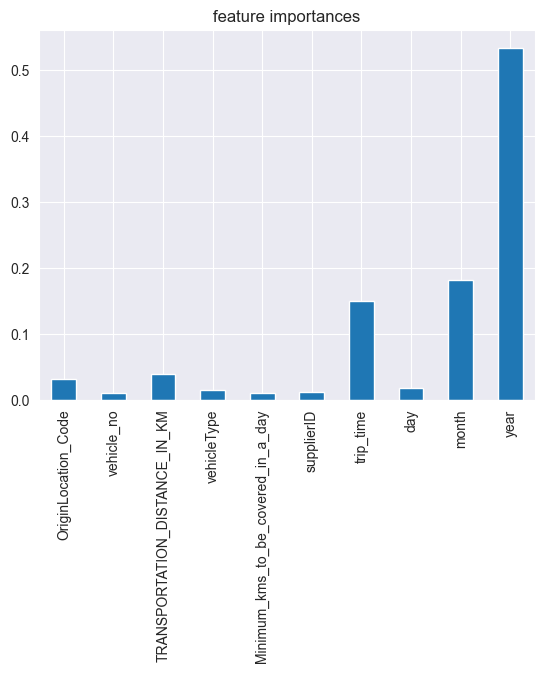

In [225]:
XGB = XGBClassifier()
XGB.fit(X1_train, y_train)
y_predict = XGB.predict(X1_test)


add_performance('XGBoost', y_test, y_predict)

feature_importances = pd.Series(XGB.feature_importances_, index = columns1)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

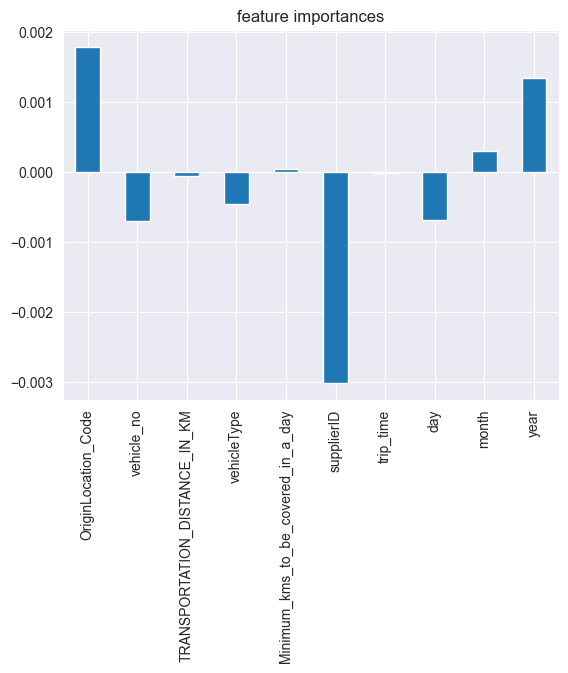

In [226]:
LR = LogisticRegression()
LR.fit(X1_train, y_train)
y_predict = LR.predict(X1_test)

add_performance('logistic regression', y_test, y_predict)

feature_importances = pd.Series(LR.coef_[0], index = columns1)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

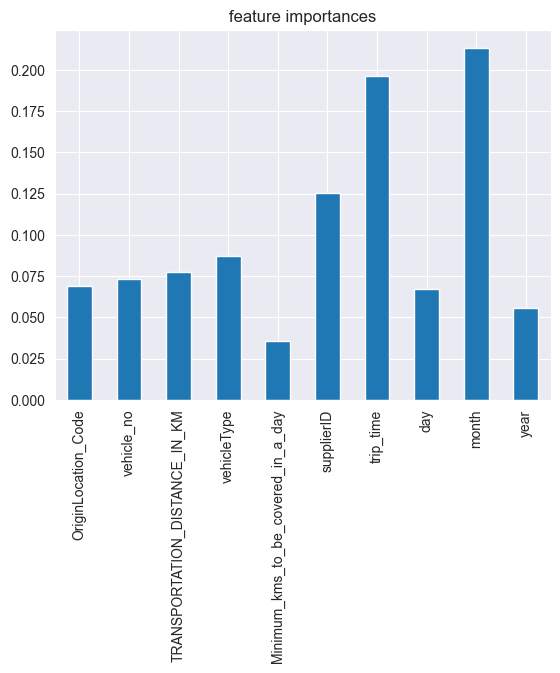

In [227]:
RF = RandomForestClassifier()
RF.fit(X1_train, y_train)
y_predict = RF.predict(X1_test)

add_performance('random forest', y_test, y_predict)

feature_importances = pd.Series(RF.feature_importances_, index = columns1)

feature_importances_plot = feature_importances.plot(kind='bar', title='feature importances')
fig = feature_importances_plot.get_figure()
plt.show()

The performance doesn't suffer much from less features, which supports the selection of features.

In [228]:
table_of_performance

,algorithm,confusion matrix,accuracy,precision,recall
0,XGBoost,"[[690, 73], [44, 1218]]",0.942222,0.943455,0.965135
1,logistic regression,"[[440, 323], [144, 1118]]",0.769383,0.775850,0.885895
2,random forest,"[[693, 70], [50, 1212]]",0.940741,0.945398,0.960380


In [229]:
y_predict

array([False,  True,  True, ...,  True,  True,  True])